<a href="https://colab.research.google.com/github/rtaglega53/pedropicapiedra/blob/master/Copia_de_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Para manejar matrices
import pandas as pd # Para leer y explorar datos
import matplotlib.pyplot as plt # Para dibujar
from google.colab import files # Para leer archivos en COLAB
from sklearn.linear_model import LinearRegression # Modelo de regresión lineal
from sklearn.preprocessing import StandardScaler # Escalador estandar
from sklearn.pipeline import Pipeline # Constructor de Pipelines
from sklearn.model_selection import train_test_split # divide y permuta el dataset
from sklearn.preprocessing import PolynomialFeatures # Mapeo polinomial
uploaded = files.upload()
df = pd.read_csv('home_data.csv')



Saving home_data.csv to home_data.csv


Empezar graficas entrenamiento


Train:  0.6954125598460001
Train:  0.695412559846


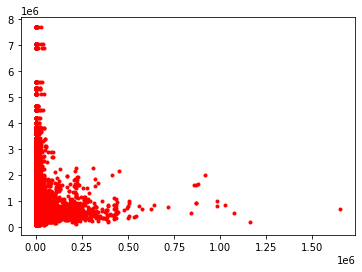

In [ ]:
x = np.asanyarray(df.drop(columns=['id','date','price','zipcode']))
y = np.asanyarray(df[['price']])
model1 = LinearRegression()
model1.fit(x, y)
print('Train: ', model1.score(x, y))
plt.plot(x, y, '.r')
model1 = Pipeline([
                  ('scaler', StandardScaler()),
                  ('Regressor', LinearRegression())])
model1.fit(x, y)
print('Train: ', model1.score(x, y))  

Explicacion de variables de regresion lineal

[-31762.42895532107, 32470.644958529156, 80827.40525270291, 5277.526038769006, 410.75269163113745, 50857.71743419873, 37877.60869771252, 20193.262023810345, 114274.71467144169, 75774.17740441432, 25955.557433090173, -72147.54695764917, 8648.932676918528, 77740.82388297228, -16479.472442156817, 18800.669378563514, -10738.15382792765]
hola
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
[-0.15041387  0.15376769  0.38276552  0.0249922   0.00194516  0.24084134
  0.17937286  0.09562703  0.5411583   0.3588355   0.1229149  -0.34166127
  0.04095781  0.36814874 -0.07804004  0.08903228 -0.0508515 ]
               importance  positive
Features                           
yr_built        -0.341661     False
bedrooms        -0.150414     False
long            -0.078040     False
sqft_lot15      -0.050852     False
floors           0.00194

Text(0.5, 1.0, 'Variable importance')

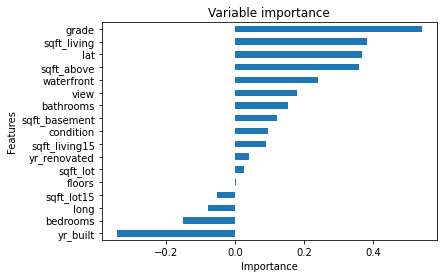

In [ ]:
labels = list(df.drop(columns=['id','date','price','zipcode']).columns)
coeff = list(model1.named_steps['Regressor'].coef_[0])
print (coeff)
print ('hola')
coeff = coeff / np.linalg.norm(coeff)  ## porque se divide entre esto?
print(labels)
print(coeff)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)  # que hace?
print(features)
features.importance.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Variable importance')

Crear grafica de nuestro modelo


Text(0, 0.5, '$y$')

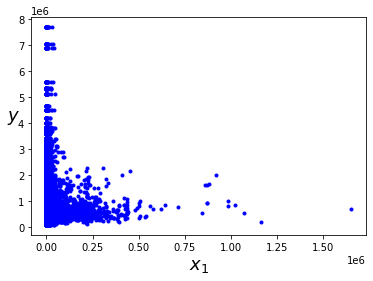

In [ ]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])

Aplicar regresion lineal

21613 21613
Train:  0.8876836269678082


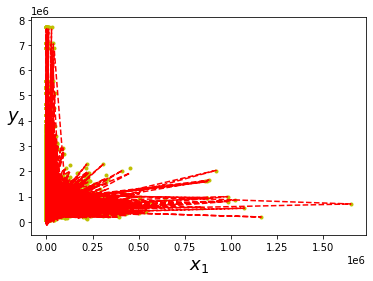

In [ ]:
# Definir grado del mapeo polinomico
d =3
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
# model = LinearRegression()
model.fit(x,y)
# Crear nuevos puntos para dibujar puntos
y_pred = model.predict(x)
print(len(x), len(y))
# plt.scatter(x,y)
plt.plot(x, y, ".y")
plt.plot(x,y_pred,'--r')

# Dibujar datos
# plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

#plt.axis([-3, 3, 0, 10])

print('Train: ', model.score(x,y))

Sobreentrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
print(x.shape,y.shape)

(16209, 17) (5404, 17) (16209, 1) (5404, 1)
(21613, 17) (21613, 1)


Mejor entrenamiento

Train:  0.8169543175031769
Test:  0.8022905460102507


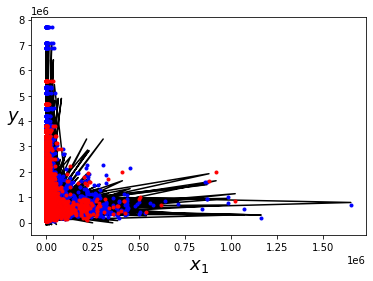

In [ ]:
d = 2
model = Pipeline([
          ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
          ('std_scaler', StandardScaler()),
          ('lin_reg', LinearRegression())])
model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
y_pred = model.predict(x)
plt.plot(x,y_pred,'-k')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 5])

print('Train: ', model.score(xtrain,ytrain))
print('Test: ', model.score(xtest, ytest))

Regularización 

Train:  0.7879527677838258
Test:  0.7710385239410491


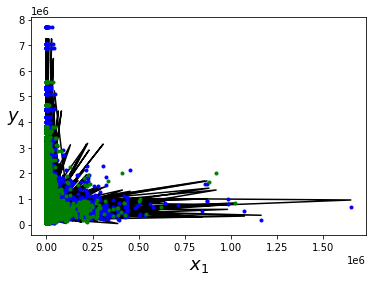

In [ ]:
from sklearn.linear_model import Ridge
d = 2
model = Pipeline([
  ('poly', PolynomialFeatures(degree=d, include_bias=False)),
  ('scaler', StandardScaler()),
  ('Regressor', Ridge(alpha=2))])

model.fit(xtrain, ytrain)

# Crear nuevos puntos para dibujar puntos
y_pred = model.predict(x)
plt.plot(x,y_pred,'-k')

# Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

model.fit(xtrain, ytrain)
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))